# Logistic Regression
Using advertising data to show some exploritory analysis and logistic regression

In [34]:
# Import pertinent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
# Import advertising data
ad_data = pd.read_csv('advertising.csv')

# Took a peek into data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [36]:
# Get more information on data
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [37]:
# Get some decriptive data
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:>

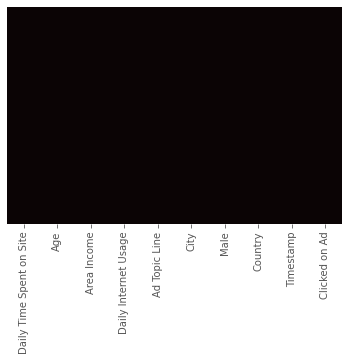

In [38]:
# Check how many missing values there are visually
sns.heatmap(ad_data.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [39]:
# Data seems to have no missing values
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

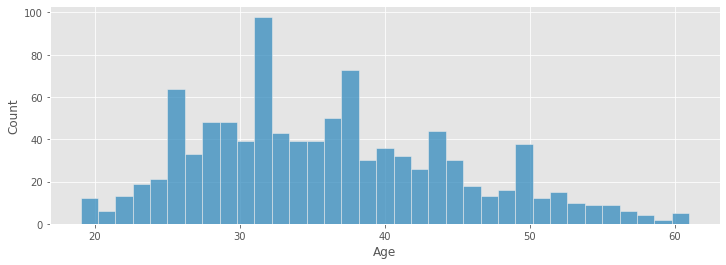

In [40]:
# Check out Age
plt.style.use('ggplot')
plt.figure(figsize=(12,4))
sns.histplot(x='Age', data=ad_data, bins=35)

In [41]:
# Use timestamp to create pandas data format
ad_data['Date'] = ad_data['Timestamp'].apply(lambda time : pd.to_datetime(time))
ad_data['Year'] = ad_data['Date'].apply(lambda date: date.year)
ad_data['Month'] = ad_data['Date'].apply(lambda date: date.month)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Year,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11,2016,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02,2016,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42,2016,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19,2016,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18,2016,6


<AxesSubplot:xlabel='Month', ylabel='Clicked on Ad'>

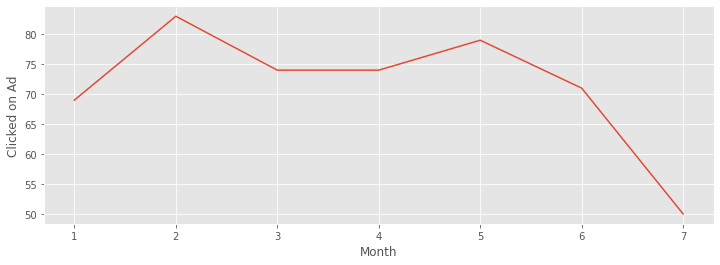

In [42]:
# Check out Clicks over time
plt.figure(figsize=(12,4))
sns.lineplot(data=ad_data.groupby('Month').sum().reset_index()[['Month', 'Clicked on Ad']], x='Month', y='Clicked on Ad')

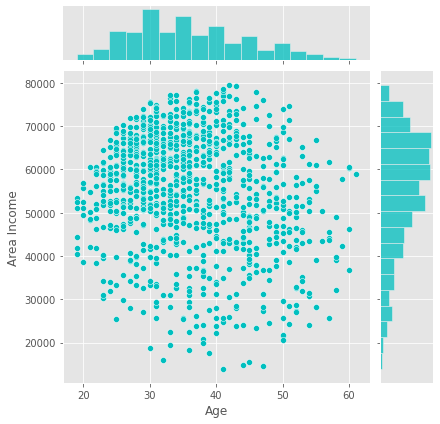

In [43]:
# Compare some features
sns.jointplot(x='Age', y='Area Income', data=ad_data, color='c')

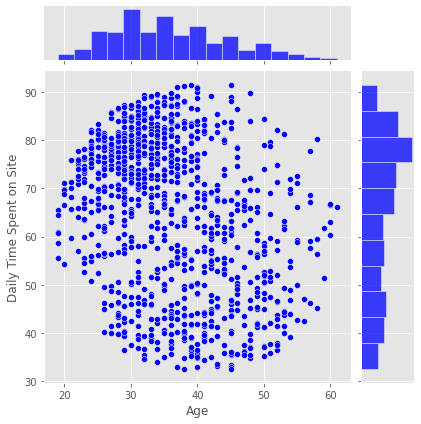

In [44]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, color='b')

C:\Users\on3mo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

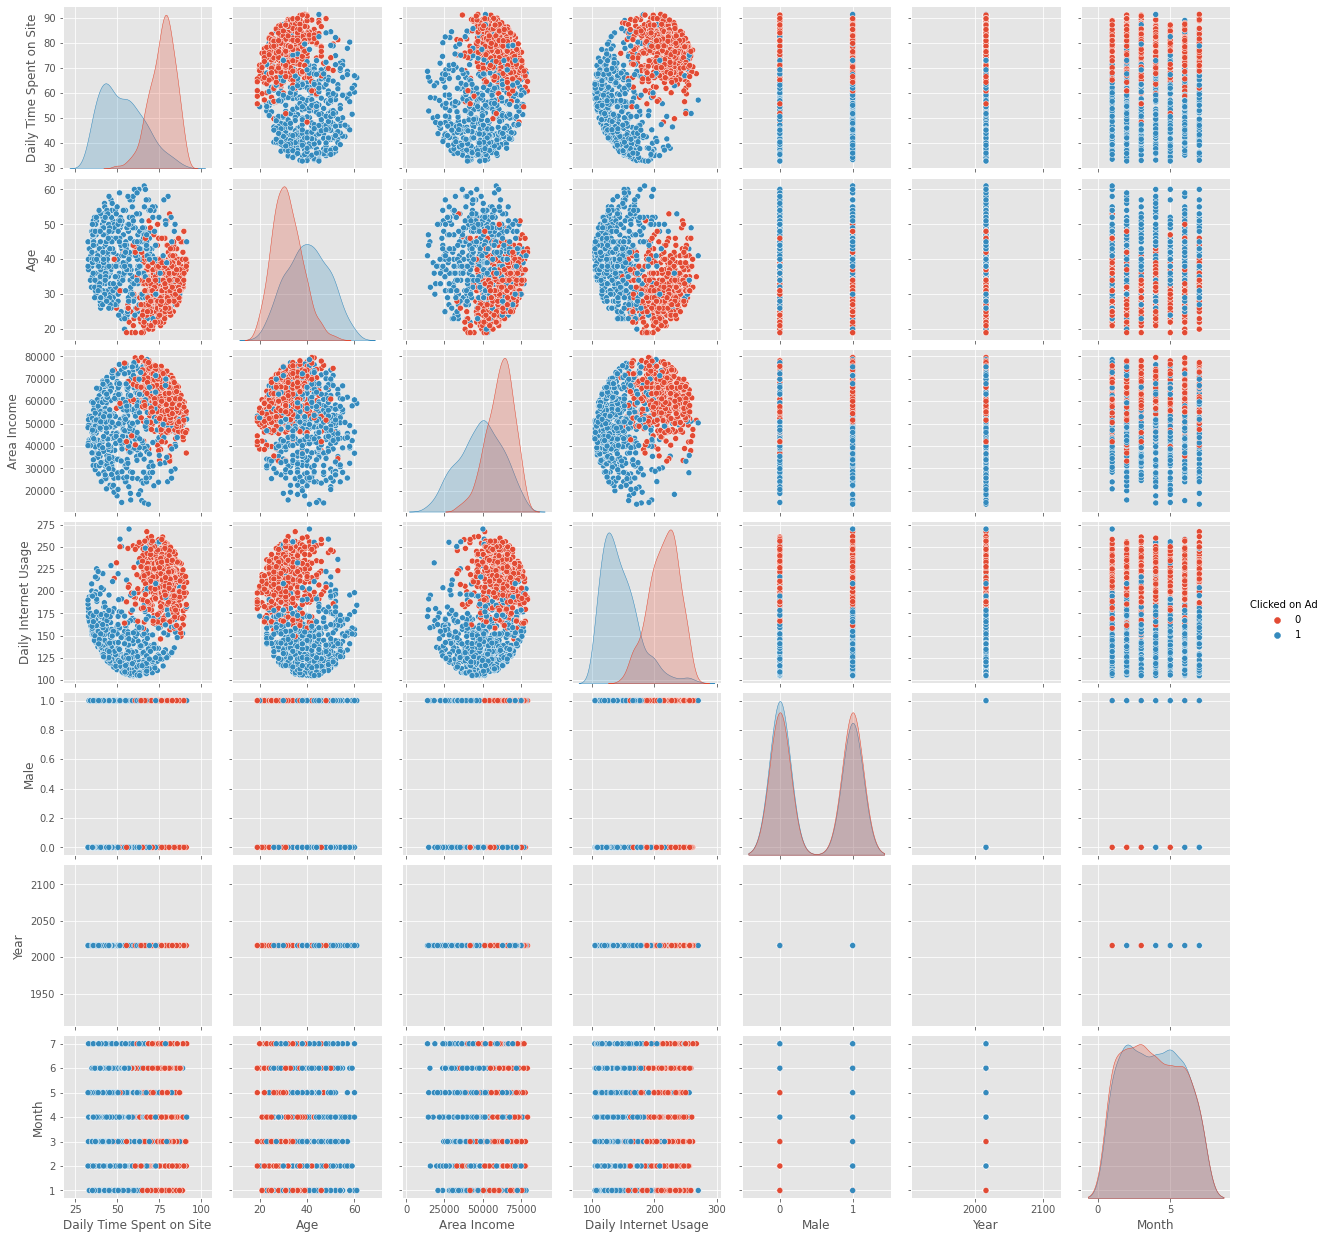

In [45]:
# Show all possible combinations
plt.figure(figsize=(12,12))
sns.pairplot(data=ad_data, hue='Clicked on Ad')

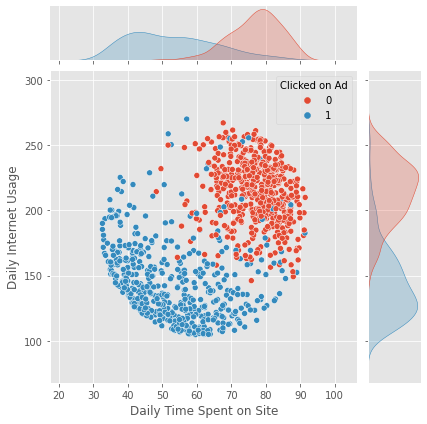

In [46]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, hue='Clicked on Ad')

In [47]:
# Split data by training and testing data , remove columns that are not necessary
from sklearn.model_selection import train_test_split
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [48]:
# Import Logistic Model
from sklearn.linear_model import LogisticRegression

In [49]:
# Create an instance of Logistic Regression
logmodel = LogisticRegression()

# Fit model
logmodel.fit(X_train, y_train)

# Create predictions from model
predictions = logmodel.predict(X_test)

In [50]:
# See Classification result to see how well model did
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[136   8]
 [ 25 131]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       144
           1       0.94      0.84      0.89       156

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



In [51]:
# Compare report if data was standardized, much better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
sdata = pd.DataFrame(scaled, columns=X.columns)
X_trains, X_tests, y_trains, y_tests = train_test_split(sdata, y, test_size=.3, random_state=13)
logmodels = LogisticRegression()
logmodels.fit(X_trains, y_trains)
pred = logmodels.predict(X_tests)
print(confusion_matrix(y_tests, pred))
print(classification_report(y_tests, pred))

[[143   1]
 [  9 147]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       144
           1       0.99      0.94      0.97       156

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

